# Data Analysis Assignment

How is AQI affected by the change in seasons in India? Looking at Particulate Matter change over time and AQI over time. Looking at data between different cities

## To Do
- Introduction
- Background (Explain the chemicals and calculations and regulations)
- Methods (Data collection (reading CSV) and Data cleaning and justification)
- Analysis (Numerical summaries and charts)
- Discussion (Same as intro but the aftermath of analysis)
    - Conclusion
- References (APA is good)


## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

sns.set_theme()

In [2]:
df = pd.read_csv("Data/city_day.csv")

In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.shape

(29531, 16)

In [5]:
df["City"].value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [8]:
df.replace(0.0,np.nan,inplace=True)

In [9]:
df.dropna(subset=df.columns.difference(['City','Date']),how='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,0.02,NaN,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,NaN,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,NaN,NaN,NaN,54.0,Satisfactory


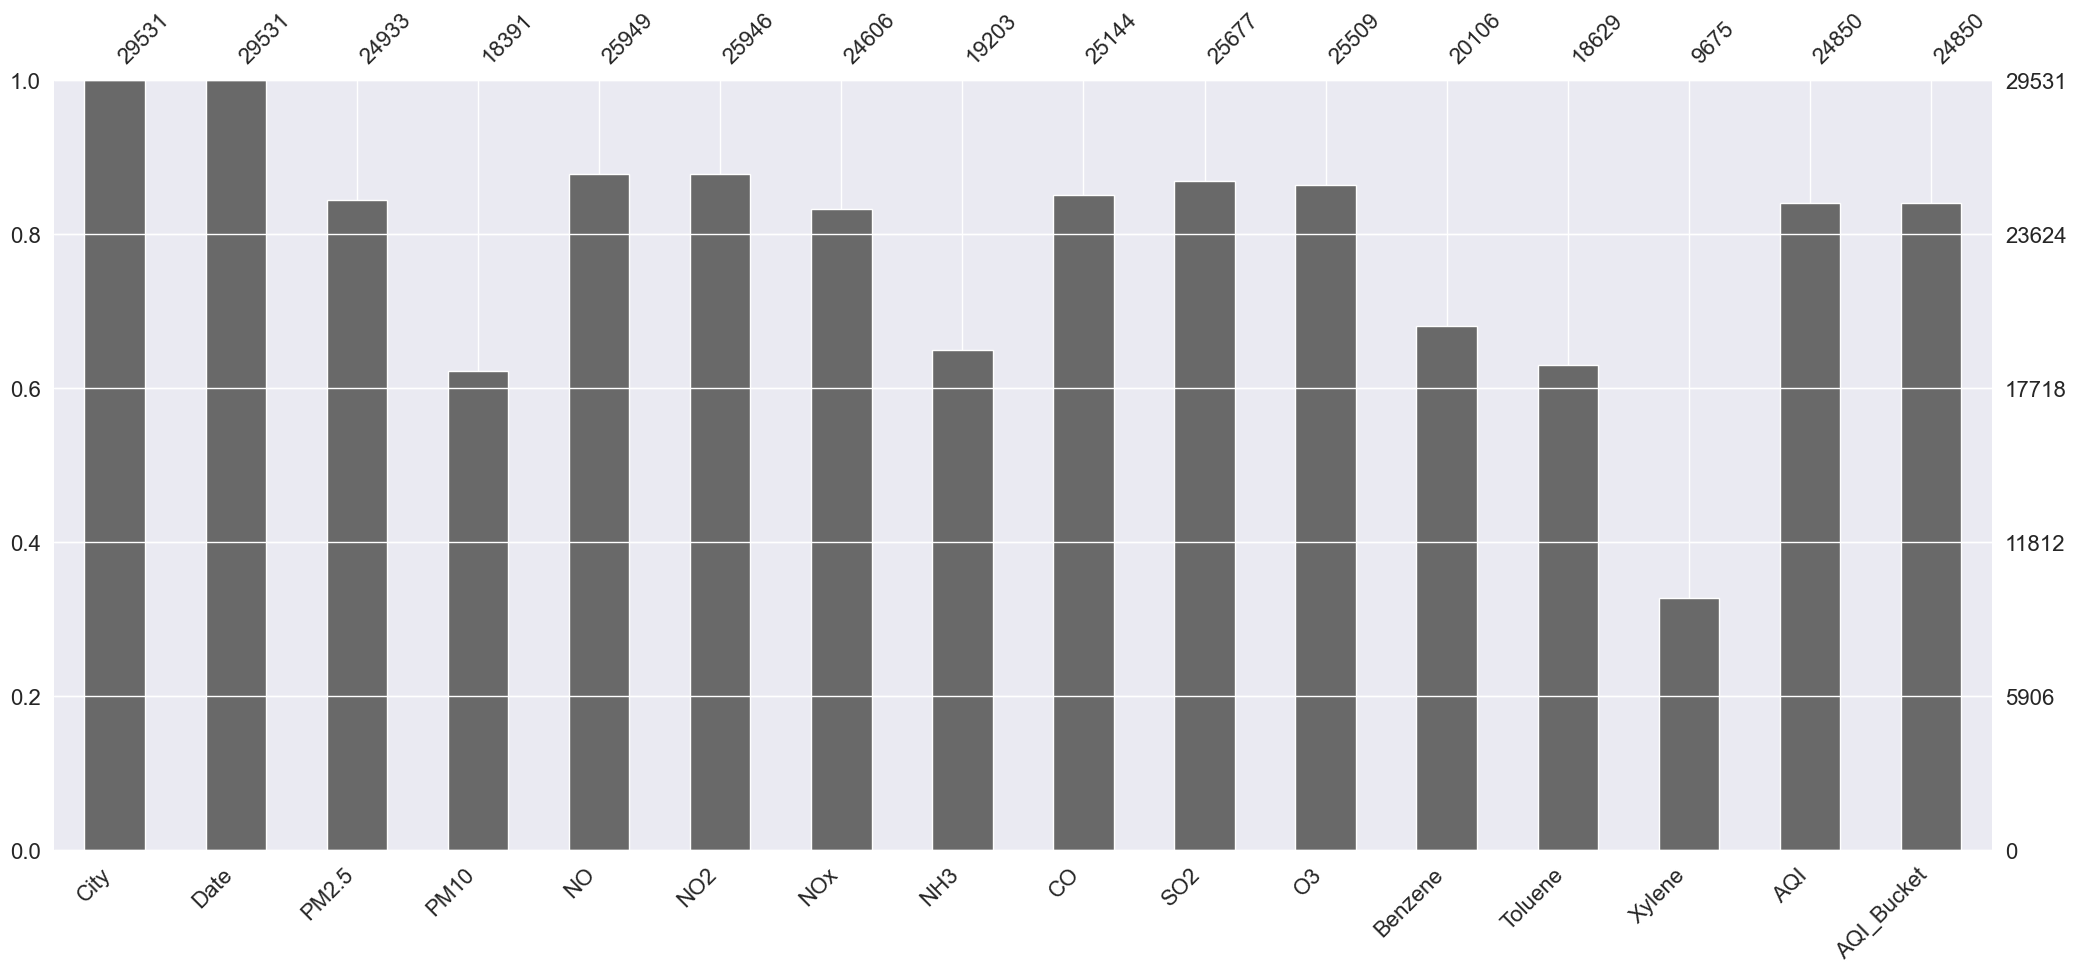

In [10]:
mn.bar(df)
plt.show()

In [11]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4925
NH3           10328
CO             4387
SO2            3854
O3             4022
Benzene        9425
Toluene       10902
Xylene        19856
AQI            4681
AQI_Bucket     4681
dtype: int64

In [12]:
df = df[df['AQI'].isna()==False]
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,NaN,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,NaN,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,NaN,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,NaN,NaN,NaN,54.0,Satisfactory


In [13]:
df.isna().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            2320
NH3            6536
CO             1218
SO2             605
O3              807
Benzene        5673
Toluene        7143
Xylene        15671
AQI               0
AQI_Bucket        0
dtype: int64

In [14]:
df['City'].value_counts()

Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: City, dtype: int64

In [15]:
df = df[df['City'].str.contains("Delhi|Bengaluru|Lucknow|Chennai|Hyderabad")]
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4373,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,91.0,Satisfactory
4374,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,120.0,Moderate
4375,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,154.0,Moderate
4376,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,119.0,Moderate
4377,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,232.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21850,Lucknow,2020-06-27,32.23,NaN,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,NaN,74.0,Satisfactory
21851,Lucknow,2020-06-28,34.58,NaN,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,NaN,77.0,Satisfactory
21852,Lucknow,2020-06-29,30.19,NaN,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,NaN,65.0,Satisfactory
21853,Lucknow,2020-06-30,38.27,NaN,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,NaN,69.0,Satisfactory


In [16]:
df['City'].value_counts()

Delhi        1999
Bengaluru    1910
Lucknow      1893
Chennai      1884
Hyderabad    1880
Name: City, dtype: int64

Removing rows
 NaN values in PM2.5 AND PM10 because AQI is invalid without at least one of these according to regulations.

In [17]:
df = df[~df[['PM2.5', 'PM10']].isna().all(axis=1)]
df = df.dropna(subset=df.columns.difference(['PM2.5','PM10']),how='all')
df['City'].value_counts()

Delhi        1998
Bengaluru    1909
Lucknow      1891
Chennai      1878
Hyderabad    1877
Name: City, dtype: int64

In [18]:
with pd.option_context('mode.chained_assignment', None):
    df['Date'] = pd.to_datetime(df['Date'])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4373,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,91.0,Satisfactory
4374,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,120.0,Moderate
4375,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,154.0,Moderate
4376,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,119.0,Moderate
4377,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,232.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21850,Lucknow,2020-06-27,32.23,NaN,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,NaN,74.0,Satisfactory
21851,Lucknow,2020-06-28,34.58,NaN,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,NaN,77.0,Satisfactory
21852,Lucknow,2020-06-29,30.19,NaN,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,NaN,65.0,Satisfactory
21853,Lucknow,2020-06-30,38.27,NaN,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,NaN,69.0,Satisfactory


In [19]:
with pd.option_context('mode.chained_assignment', None):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
df = df.reset_index()
df = df.drop('index', axis=1)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,91.0,Satisfactory,21,3,2015
1,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,120.0,Moderate,22,3,2015
2,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,154.0,Moderate,23,3,2015
3,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,119.0,Moderate,24,3,2015
4,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,232.0,Poor,25,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9548,Lucknow,2020-06-27,32.23,NaN,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,NaN,74.0,Satisfactory,27,6,2020
9549,Lucknow,2020-06-28,34.58,NaN,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,NaN,77.0,Satisfactory,28,6,2020
9550,Lucknow,2020-06-29,30.19,NaN,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,NaN,65.0,Satisfactory,29,6,2020
9551,Lucknow,2020-06-30,38.27,NaN,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,NaN,69.0,Satisfactory,30,6,2020


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9553 entries, 0 to 9552
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        9553 non-null   object        
 1   Date        9553 non-null   datetime64[ns]
 2   PM2.5       9497 non-null   float64       
 3   PM10        5504 non-null   float64       
 4   NO          9551 non-null   float64       
 5   NO2         9551 non-null   float64       
 6   NOx         8910 non-null   float64       
 7   NH3         7803 non-null   float64       
 8   CO          9321 non-null   float64       
 9   SO2         9452 non-null   float64       
 10  O3          9337 non-null   float64       
 11  Benzene     8508 non-null   float64       
 12  Toluene     8648 non-null   float64       
 13  Xylene      2824 non-null   float64       
 14  AQI         9553 non-null   float64       
 15  AQI_Bucket  9553 non-null   object        
 16  Day         9553 non-nul

In [21]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
count,9497.000000,5504.000000,9551.000000,9551.000000,8910.000000,7803.000000,9321.000000,9452.000000,9337.000000,8508.000000,8648.000000,2824.000000,9553.000000,9553.000000,9553.000000,9553.000000
mean,72.814051,137.236139,16.349884,31.837152,29.385324,35.002215,1.446607,9.260758,37.585442,2.388816,8.048041,1.700485,160.311106,15.733173,6.378206,2017.370774
std,66.250736,106.037817,21.340089,20.282882,26.922125,32.758635,2.304060,6.734123,20.532518,7.566304,13.805683,2.752990,107.755488,8.819263,3.408694,1.574395
min,1.720000,0.210000,0.110000,0.620000,0.470000,0.020000,0.010000,0.710000,0.100000,0.010000,0.010000,0.010000,20.000000,1.000000,1.000000,2015.000000
25%,32.330000,66.332500,5.975000,16.500000,13.700000,15.800000,0.680000,5.070000,23.730000,0.370000,1.200000,0.220000,83.000000,8.000000,4.000000,2016.000000
50%,51.400000,102.510000,9.280000,27.000000,21.260000,27.550000,0.970000,7.140000,33.970000,1.170000,3.335000,0.730000,119.000000,16.000000,6.000000,2017.000000
75%,83.880000,167.675000,16.045000,42.070000,34.167500,41.395000,1.400000,11.130000,47.480000,2.630000,9.240000,2.030000,207.000000,23.000000,9.000000,2019.000000
max,685.360000,796.880000,221.030000,162.500000,254.800000,352.890000,48.070000,71.560000,257.730000,391.880000,411.520000,28.240000,737.000000,31.000000,12.000000,2020.000000


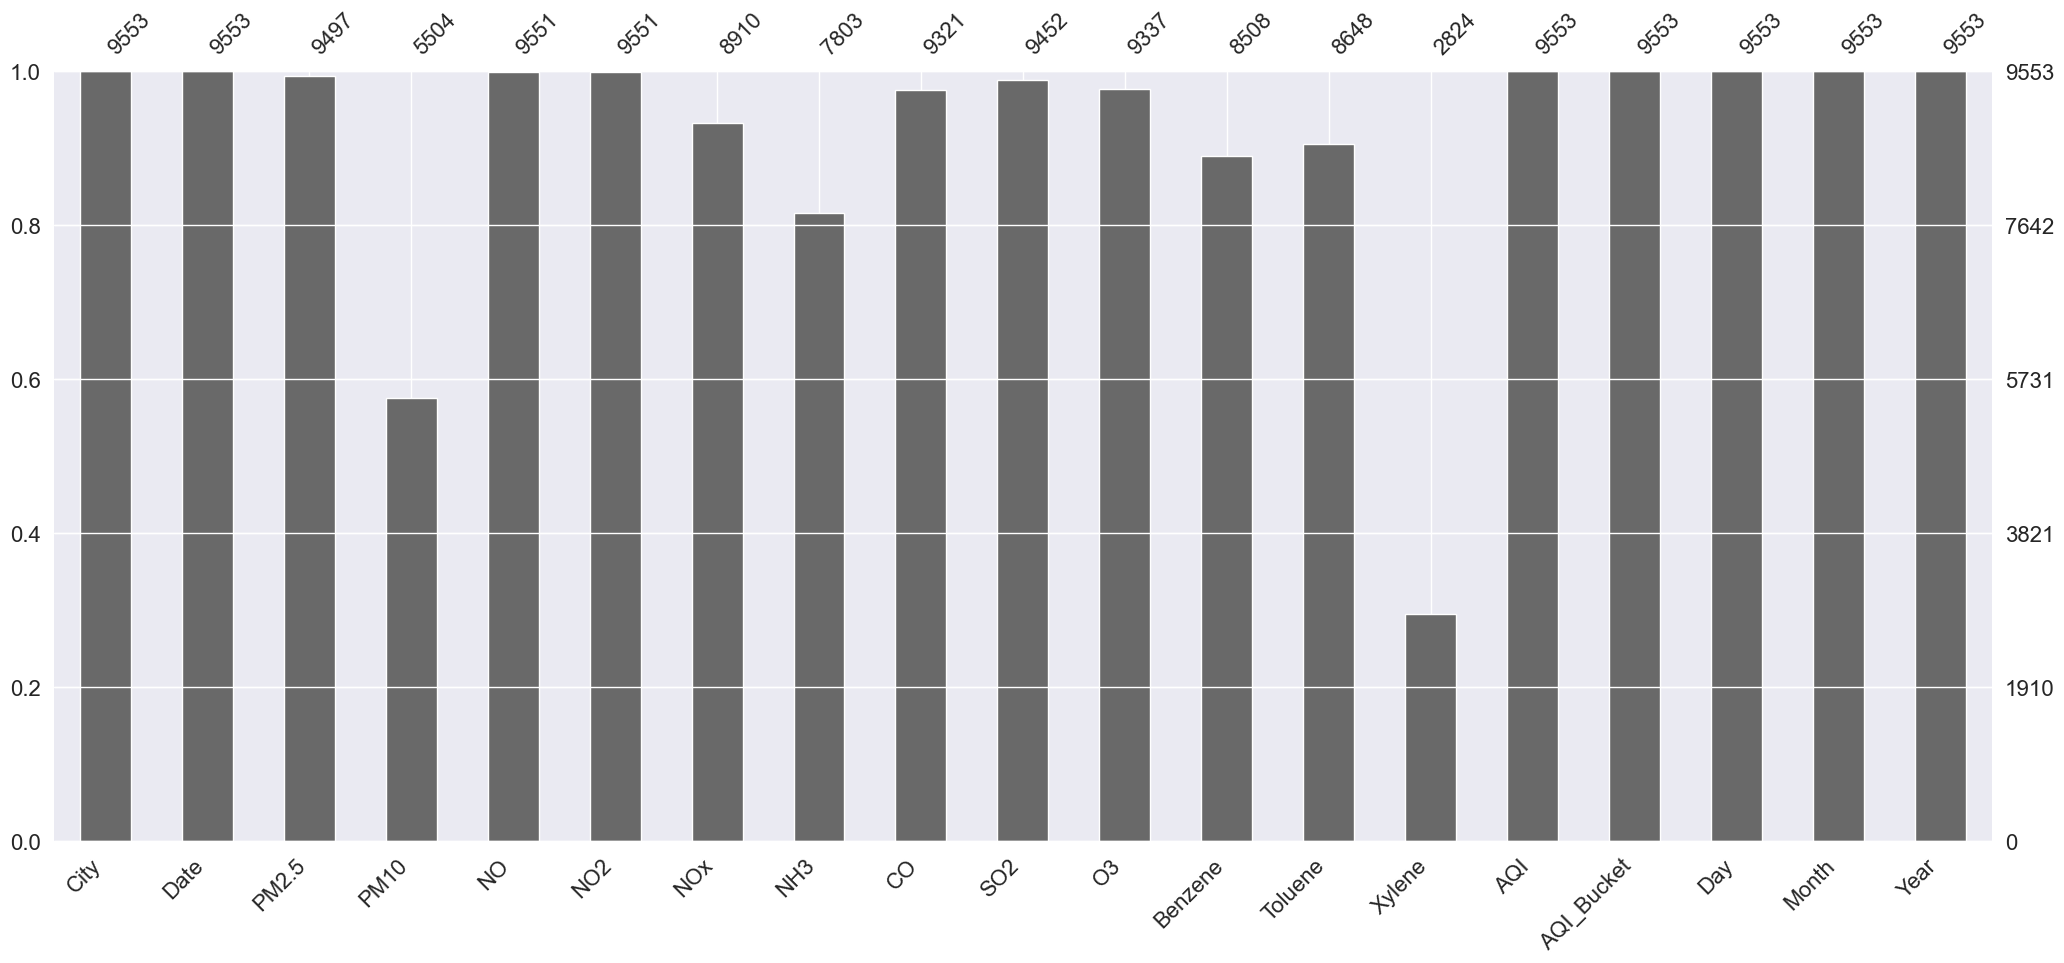

In [22]:
mn.bar(df)
plt.show()

In [23]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,91.0,Satisfactory,21,3,2015
1,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,120.0,Moderate,22,3,2015
2,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,154.0,Moderate,23,3,2015
3,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,119.0,Moderate,24,3,2015
4,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,232.0,Poor,25,3,2015


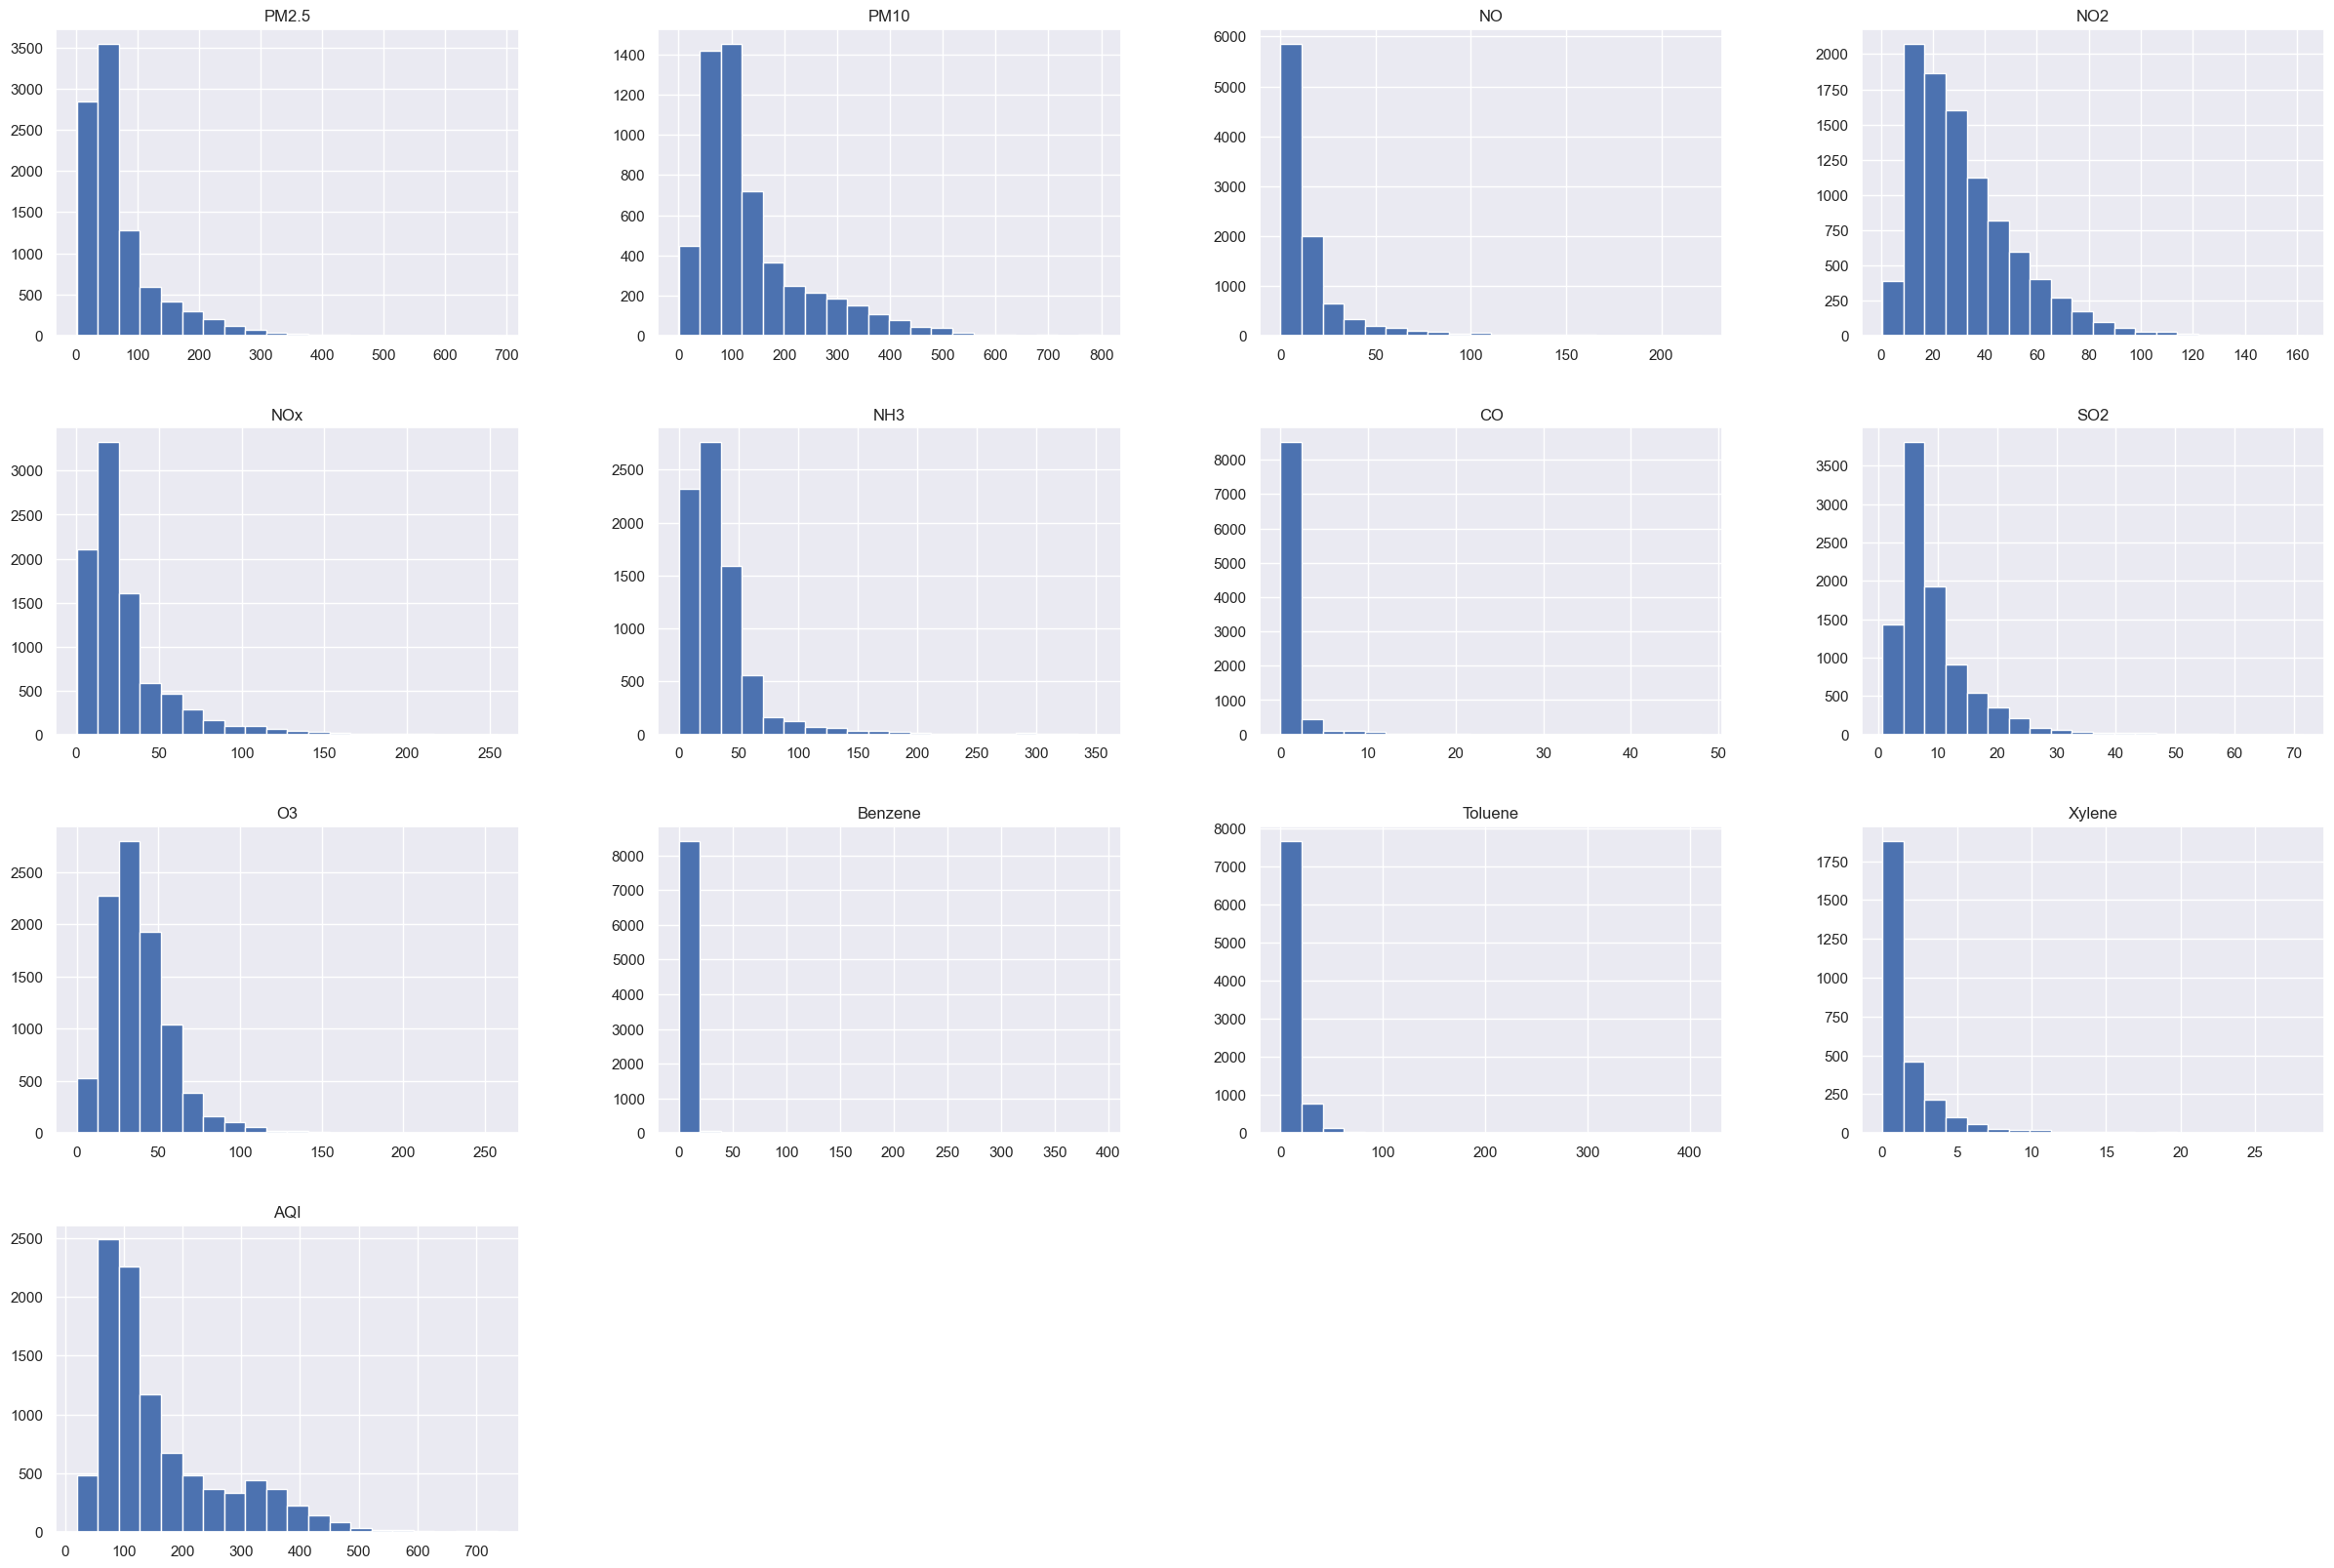

In [24]:
df.drop(df[['Date','Day','Month','Year']],axis=1).hist(bins=20,figsize=(30,20))
plt.show()

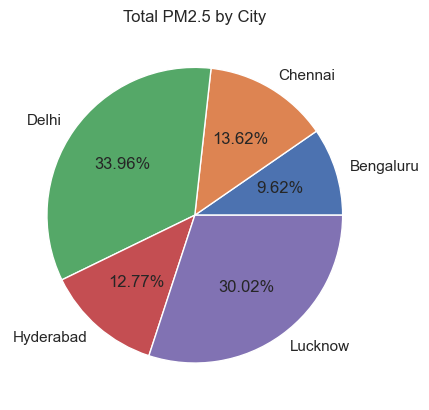

In [25]:
x = df.groupby(['City'])['PM2.5'].sum().reset_index()
plt.title('Total PM2.5 by City')
plt.pie(x['PM2.5'],labels=x['City'],autopct='%1.2f%%')
plt.show()

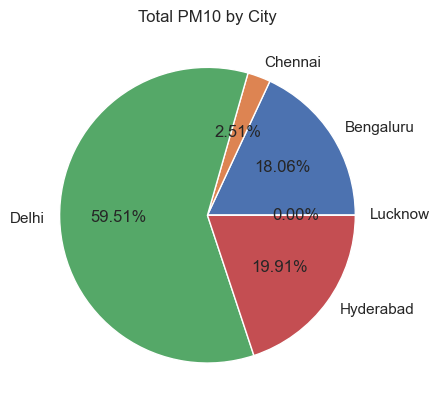

In [26]:
plt.title('Total PM10 by City')
x= df.groupby(['City'])['PM10'].sum().reset_index()
plt.pie(x['PM10'],labels=x['City'],autopct='%1.2f%%')
plt.show()

In [61]:
cityMeanAQI = df[['City','AQI','Year']].groupby(['City','Year']).mean().sort_values(['City']).round(2)
cityMeanAQI.unstack().unstack().unstack().unstack().unstack().unstack().unstack()

msg = 'hello class, welcome to CSCI2000U'
print(msg[6::2])

cas ecm oCC20U


In [56]:
custom_palette = {}
for index in cityMeanAQI.City:
    val = cityMeanAQI[cityMeanAQI.City == index]['AQI'].values
    if val <= 50:
        custom_palette[index] = '#00B050'
    elif val <= 100:
        custom_palette[index] = '#91CF4F'
    elif val <= 200:
        custom_palette[index] = '#FEFF00'
    elif val <= 250:
        custom_palette[index] = '#FFC001'
    elif val > 250:
        custom_palette[index] = '#FF0000'
    else:
        custom_palette[index] = '#FFFFFF'

sns.barplot(x='City',y='AQI',data=cityMeanAQI,palette=custom_palette).set(ylabel='Mean AQI',title='Average AQI by City from 2015 to 2020')

plt.plot()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'City'

In [ ]:
delhiAQIBucketList2020 = df.loc[(df['City'] == 'Delhi')]
# delhiAQIBucket2020 = delhiAQIBucketList2020["AQI_Bucket"].value_counts()
# delhiAQIBucket2020
sns.countplot(x="AQI_Bucket",data=delhiAQIBucketList2020).set(xlabel="AQI Buckets",ylabel="Frequency",title="Delhi AQI Bucket Category Frequency from 2015 to 2020")
plt.show()

In [ ]:
cityMeanAQIMonthly2020 = df.loc[(df['Year'] == 2020)]
cityMeanAQIMonthly2020 = cityMeanAQIMonthly2020[["City","AQI","Month"]].reset_index()
cityMeanAQIMonthly2020.drop("index",axis=1,inplace=True)
cityMeanAQIMonthly2020 = cityMeanAQIMonthly2020.groupby(["Month","City"],as_index=False).agg({"AQI":'mean'})

cityMeanAQIMonthly2019 = df.loc[(df['Year'] == 2019)]
cityMeanAQIMonthly2019 = cityMeanAQIMonthly2019[["City","AQI","Month"]].reset_index()
cityMeanAQIMonthly2019.drop("index",axis=1,inplace=True)
cityMeanAQIMonthly2019 = cityMeanAQIMonthly2019.groupby(["Month","City"],as_index=False).agg({"AQI":'mean'})

cityMeanAQIMonthly2018 = df.loc[(df['Year'] == 2018)]
cityMeanAQIMonthly2018 = cityMeanAQIMonthly2018[["City","AQI","Month"]].reset_index()
cityMeanAQIMonthly2018.drop("index",axis=1,inplace=True)
cityMeanAQIMonthly2018 = cityMeanAQIMonthly2018.groupby(["Month","City"],as_index=False).agg({"AQI":'mean'})

cityMeanAQIMonthly2017 = df.loc[(df['Year'] == 2017)]
cityMeanAQIMonthly2017 = cityMeanAQIMonthly2017[["City","AQI","Month"]].reset_index()
cityMeanAQIMonthly2017.drop("index",axis=1,inplace=True)
cityMeanAQIMonthly2017 = cityMeanAQIMonthly2017.groupby(["Month","City"],as_index=False).agg({"AQI":'mean'})

cityMeanAQIMonthly2016 = df.loc[(df['Year'] == 2016)]
cityMeanAQIMonthly2016 = cityMeanAQIMonthly2016[["City","AQI","Month"]].reset_index()
cityMeanAQIMonthly2016.drop("index",axis=1,inplace=True)
cityMeanAQIMonthly2016 = cityMeanAQIMonthly2016.groupby(["Month","City"],as_index=False).agg({"AQI":'mean'})

cityMeanAQIMonthly2015 = df.loc[(df['Year'] == 2015)]
cityMeanAQIMonthly2015 = cityMeanAQIMonthly2015[["City","AQI","Month"]].reset_index()
cityMeanAQIMonthly2015.drop("index",axis=1,inplace=True)
cityMeanAQIMonthly2015 = cityMeanAQIMonthly2015.groupby(["Month","City"],as_index=False).agg({"AQI":'mean'})

In [ ]:
sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2015).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Monthly Mean AQI in 2015')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2016).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Monthly Mean AQI in 2016')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2017).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Monthly Mean AQI in 2017')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2018).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Monthly Mean AQI in 2018')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2019).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Monthly Mean AQI in 2019')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2020).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul'],xlabel='Months',ylabel='Mean AQI',title='Monthly Mean AQI in 2020')
plt.show()

In [ ]:
delhiTime = df.loc[df['City'] == 'Delhi']
bengTime = df.loc[df['City'] == 'Bengaluru']
#plt.plot_date(x=delhiTime.Date,y=delhiTime.AQI)
#plt.gcf().autofmt_xdate()
# plt.gca().xaxis.set_major_formatter(mpDates.DateFormatter('%m-%d-%Y'))

sns.lineplot(data=delhiTime, x=delhiTime.Date, y='AQI').set(title='Air Quality Index of Delhi from 2015 to 2020',xlabel='Year')
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=bengTime, x=bengTime.Date, y='AQI',color='orange').set(title='Air Quality Index of Bengaluru from 2015 to 2020',xlabel='Year',)
plt.xticks(rotation=45)
plt.show()



In [ ]:
# winter = df.loc[(df['Month'].between(1,3)) & (df['Year'] == 2019)]
# winter.reset_index(inplace=True)
# winter.drop(winter.columns.difference(['City','AQI','Month']),inplace=True,axis=1)
# winter.sort_values(by=['Month','City'],ascending=[True, True],inplace=True)
# winter = winter.assign(Season='Winter')
# #sns.boxplot(x='AQI',data=delhiWinter)
#
# spring = df.loc[(df['Month'].between(4,6)) & (df['Year'] == 2019)]
# spring.reset_index(inplace=True)
# spring.drop(spring.columns.difference(['City','AQI','Month']),inplace=True,axis=1)
# spring.sort_values(by=['Month','City'],ascending=[True, True],inplace=True)
# spring = spring.assign(Season='Spring')
# #sns.boxplot(x='AQI',data=delhiSpring)
# data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
# #data1
# cdf = pd.concat([winter,spring])
# #print(cdf)
# # mdf = pd.melt(cdf,id_vars=['Location'],var_name=['AQI'])
# # print(mdf.head())
# sns.boxplot(data=cdf,x='AQI',y='Season',hue='City',orient='h')
# plt.show()
with pd.option_context('mode.chained_assignment', None):
    benY2k19 =  df.loc[(df['Year'] == 2019) & (df['City'] == 'Bengaluru')]
    benY2k19.drop(benY2k19.columns.difference(['AQI','Month']),inplace=True,axis=1)
    benY2k19.sort_values(by=['Month'],ascending=True,inplace=True)
    benY2k19.reset_index(inplace=True)
    conditions = [
        benY2k19['Month'].between(1,3),
        benY2k19['Month'].between(4,6),
        benY2k19['Month'].between(7,9),
        benY2k19['Month'].between(10,12),
    ]
    assigns = ['Winter','Spring','Summer','Fall']

    benY2k19['Season'] = np.select(conditions,assigns,default=0)
    sns.boxplot(data=benY2k19,x='AQI',y='Season',orient='h').set(title='Bengaluru Air Quality per semester in 2019')
    plt.show()

    cheY2k19 =  df.loc[(df['Year'] == 2019) & (df['City'] == 'Chennai')]
    cheY2k19.drop(cheY2k19.columns.difference(['AQI','Month']),inplace=True,axis=1)
    cheY2k19.sort_values(by=['Month'],ascending=True,inplace=True)
    cheY2k19.reset_index(inplace=True)
    conditions = [
        cheY2k19['Month'].between(1,3),
        cheY2k19['Month'].between(4,6),
        cheY2k19['Month'].between(7,9),
        cheY2k19['Month'].between(10,12),
    ]
    assigns = ['Winter','Spring','Summer','Fall']

    cheY2k19['Season'] = np.select(conditions,assigns,default=0)
    sns.boxplot(data=cheY2k19,x='AQI',y='Season',orient='h').set(title='Chennai Air Quality per semester in 2019')
    plt.show()

    delY2k19 =  df.loc[(df['Year'] == 2019) & (df['City'] == 'Delhi')]
    delY2k19.drop(delY2k19.columns.difference(['AQI','Month']),inplace=True,axis=1)
    delY2k19.sort_values(by=['Month'],ascending=True,inplace=True)
    delY2k19.reset_index(inplace=True)
    conditions = [
        delY2k19['Month'].between(1,3),
        delY2k19['Month'].between(4,6),
        delY2k19['Month'].between(7,9),
        delY2k19['Month'].between(10,12),
    ]
    assigns = ['Winter','Spring','Summer','Fall']

    delY2k19['Season'] = np.select(conditions,assigns,default=0)
    sns.boxplot(data=delY2k19,x='AQI',y='Season',orient='h').set(title='Delhi Air Quality per semester in 2019')
    plt.show()

    hydY2k19 =  df.loc[(df['Year'] == 2019) & (df['City'] == 'Hyderabad')]
    hydY2k19.drop(hydY2k19.columns.difference(['AQI','Month']),inplace=True,axis=1)
    hydY2k19.sort_values(by=['Month'],ascending=True,inplace=True)
    hydY2k19.reset_index(inplace=True)
    conditions = [
        hydY2k19['Month'].between(1,3),
        hydY2k19['Month'].between(4,6),
        hydY2k19['Month'].between(7,9),
        hydY2k19['Month'].between(10,12),
    ]
    assigns = ['Winter','Spring','Summer','Fall']

    hydY2k19['Season'] = np.select(conditions,assigns,default=0)
    sns.boxplot(data=hydY2k19,x='AQI',y='Season',orient='h').set(title='Hyderabad Air Quality per semester in 2019')
    plt.show()

    lucY2k19 =  df.loc[(df['Year'] == 2019) & (df['City'] == 'Lucknow')]
    lucY2k19.drop(lucY2k19.columns.difference(['AQI','Month']),inplace=True,axis=1)
    lucY2k19.sort_values(by=['Month'],ascending=True,inplace=True)
    lucY2k19.reset_index(inplace=True)
    conditions = [
        lucY2k19['Month'].between(1,3),
        lucY2k19['Month'].between(4,6),
        lucY2k19['Month'].between(7,9),
        lucY2k19['Month'].between(10,12),
    ]
    assigns = ['Winter','Spring','Summer','Fall']

    lucY2k19['Season'] = np.select(conditions,assigns,default=0)
    sns.boxplot(data=lucY2k19,x='AQI',y='Season',orient='h').set(title='Lucknow Air Quality per semester in 2019')
    plt.show()

    allY2k19 =  df.loc[(df['Year'] == 2019)]
    allY2k19.drop(allY2k19.columns.difference(['City','AQI','Month']),inplace=True,axis=1)
    allY2k19.sort_values(by=['Month','City'],ascending=[True,True],inplace=True)
    allY2k19.reset_index(inplace=True)
    conditions = [
        allY2k19['Month'].between(1,3),
        allY2k19['Month'].between(4,6),
        allY2k19['Month'].between(7,9),
        allY2k19['Month'].between(10,12),
    ]
    assigns = ['Winter','Spring','Summer','Fall']

    allY2k19['Season'] = np.select(conditions,assigns,default=0)
    plt.figure(figsize=(10,15))
    sns.boxplot(data=allY2k19,x='AQI',y='Season',orient='h',hue='City',).set(title='All cities Air Quality per semester in 2019')
    plt.show()

In [ ]:
delY2k19.describe().round()

## References
   1. References the libraries
   2. A